# A spatial study of InPost's deployment strategy of parcel pick-up points in relation to competitors 

**Authors**: Michał Woźniak (385190) & Michał Wrzesiński (385197)

# 1. Introduction

The e-commerce market has been growing rapidly over the past few years, and the Covid-19 pandemic has further enhanced this effect by making irreversible changes in consumer habits. Currently, one of the fastest growing e-commerce markets in Europe is Poland. Companies such as: Allegro, OLX, Amazon, Aliexpress have an average daily turnover of several million baskets. [PWC](https://www.pwc.pl/pl/media/2021-02-09-analiza-pwc-prognoza-rozwoju-rynku-ecommerce-w-polsce.html) estimated that in 2026 the gross value of the Polish e-commerce market will be at the level of 162 billion PLN. 

In order to handle such volume of parcels, well-functioning logistics companies are required to deliver the ordered parcel within a short time from the order. In Poland, there are several international logistic companies, e.g. DHL, DPD; Poczta Polska is an important local player; however, InPost enjoys the greatest recognition among customers. Its success has two sources: firstly, InPost has developed a network of parcel machines (Paczkomat) which have revolutionized the way we receive parcels; secondly, InPost has perfectly operationalized logistics thus is able to deliver parcels in a very short time.

One of the obvious elements of InPost's successful logistics is an appropriate deployment strategy for parcel pick-up points. This point determines how convenient the InPost service is for the end user. As we suppose, the models that determine the choice of a spatial point to place a Paczkomat are not ideal because they do not naturally take into account constraints such as the inability to lease a given point in space. Thus, departments responsible for the expansion of new pick-up points can often make decisions about placing a parcel machine in an intuitive way (for instance close to the shopping mall), without statistical basis (they probably have their own targets to achieve - to receive bonuses and they do not care about evaluation of their choice in the short/mid-term). In addition, recently, more and more competitors for InPost have appeared (adopting the same model of delivery into parcel machine), such as Ruch or even Poczta Polska. It seems to be logical that they possibly copy the deployment choices of InPost. Therefore, it seems very interesting to analyze how InPost's pick-up points deployment situation looks like compared to the competition. In addition, it is worth verifying whether the deployment determinants of InPost's Paczkomats are consistent with the literature. We are referring here to the [Morganti et al. (2014)](https://www.sciencedirect.com/science/article/pii/S2210539514000078) publication which suggests such indicators of pick-up point deployment: demographic indicators (population density, employment rate, computer ownership, Internet access), centers and nodes for city users ("parameters related to end-consumers' mobility and accessibility to socio-economic activities, in particular end-consumers' use of both public transport and private cars, and the density of retail outlets and commercial services, business and employment sites, cultural and leisure centers and public transportation nodes"), parcels flow within the network (mostly related to the transport system and users preferences).

The purpose of this project is to examine the deployment strategy of InPost parcel pick-up points compared to the competition in multivariate environment. Furthermore, we want to test whether the deployment determinants (herein referred to as control variables) indicated by the literature and our modeling intuition are relevant to InPost's strategy. 

We state following research questions:

1. Does InPost have parcel pick-up points deployed in line with the competition?
2. Do control variables affect the number of InPost pickup points in a given area?
3. Are spatial effects significant in multivariate econometric models?

To answer the above research questions, we conducted a full econometric analysis based primarily on spatial statistics and spatial models. In order to simplify the computational complexity of the task, we focused only on two cities in Poland: Warsaw and Cracow. These are two key cities from the point of view of InPost (Warsaw - the capital of Poland, Krakow - where InPost was established). Depending on the modeling approach we used different levels of data aggregation for Spatial dependence models - grid 1km x 1km, for Spatial drift models - point data. We are testing those approaches because in this problem, both Spatial Autocorrelation and Spatial Drift seem to be intuitive phenomena.

We present following table of content for this research:

1. Introduction
2. Data gathering
3. Dataset construction
4. Spatial visualizations
5. Spatial statistical explanatory analysis
6. Non-spatial statistical explanatory analysis
7. Spatial dependence models
8. Spatial drift models
9. Conclusions

# 2. Data gathering

This part is devoted to data collection process. As the output we obtain raw data which will be transformed to the final dataset in the 3. Dataset construction section. 

Generally, we devided data into 4 categories: 

* pick-up points data
* spatial shapes data
* demographic data
* points of interest data.

Pick-up points data comes from websites like: [Bliskapaczka.pl](https://bliskapaczka.pl) and [DHL](https://www.dhl.com/pl-pl/home.html?locale=true). 

Spatial shapes data comes from [GUGIK](https://gis-support.pl/baza-wiedzy-2/dane-do-pobrania/granice-administracyjne/) (head office of geodesy and cartography in Poland). 

Demographic data are taken from the [Inspire repository](https://geo.stat.gov.pl/inspire) and it represents indicators for 1km2 grids in Poland. 

Finally, we obtained points of interest data from [OSM](https://download.geofabrik.de/europe/poland.html) repository. This is amazing site which store snapshots of the OSM in shape files!!! 

## Import dependencies

In [ ]:
from google_drive_downloader import GoogleDriveDownloader
import requests
import json
import numpy as np
import pandas as pd

%config Completer.use_jedi = False

## Utilities

We define some utilities for code reproducibility. 

In [ ]:
def download_gd_data_from_dict(dictionary: dict):
    '''
    Download, save and unzip data from Google Drive
    '''
    for i,j in dictionary.items():
        GoogleDriveDownloader.download_file_from_google_drive(file_id=j,
                                            dest_path=f"../datasets/raw_data/{i}/{i}.zip",
                                            unzip=True,
                                            showsize=True,
                                            overwrite=False)

def download_json_data_from_url(name:str, url: str):
    '''
    Download and save data from JSON API outputs
    '''
    response = requests.get(url).text
    df = pd.DataFrame(json.loads(response))
    df.to_csv(f"../datasets/raw_data/{name}.csv")

## Download data collected and stored on our Google Drive

We decided to download data from GUIGK, OSM and Inspire (using links attached in the introduction to this stage of study) and store it on our academic Google Drive to obtain reproducibility in any time. Thanks to our functional utilities we can just pass direct link to the file and then download, store and unzip files with the data! Does data are not stored in our remote git repository due to their size, but thanks to Google Drive they are available for anyone!

You can also inspect the file via Browser just combine: https://drive.google.com/file/d/ + file_id, for instace: https://drive.google.com/file/d/1BZCmADIZhJuf1_Jh-f6D8vSpI8p5-2wd

### Source: GUIGK

In [ ]:
gugik = {'guigk_voi':'1BZCmADIZhJuf1_Jh-f6D8vSpI8p5-2wd',
        'guigk_pov':'1wX99dmNUbiEKYKh-qAfxDipT9oC6DLzE',
        'guigk_com':'1URjb9NM6Fm_qES5kC4QPPXZGERzarUIa'}

download_gd_data_from_dict(gugik)

### Source: OSM

In [ ]:
osm = {'osm_mazowieckie':'195E_n9JlgavFWp4mbaOCHAYKFWziBkc0',
        'osm_malopolskie':'1KG6uPhCZ-jKDgEpBU46WKHXVG_Mc-dBS'}

download_gd_data_from_dict(osm)

### Source: Inspire

In [ ]:
inspire = {"inspire":"1avnBMziIn9uLetSbucMrZlZadhnSUvPE"}
download_gd_data_from_dict(inspire)

## Scrape pick-up points data from websites

We collect that about pick-up points from two website or to be more precise from their APIs. It is the smartest way to gather this data in seconds!

### Source: Bliskapaczka.pl

In [ ]:
url = 'https://pos.bliskapaczka.pl/api/v1/pos?fields=operator%2Ccode%2Clatitude%2Clongitude%2Cbrand%2CbrandPretty%2CoperatorPretty%2Ccod%2Cavailable%2C+city%2C+street&operators=RUCH%2CINPOST%2CPOCZTA%2CDPD%2CUPS%2CFEDEX'
download_json_data_from_url("bliska_paczka", url)

### Source: DHL

In [ ]:
url = 'https://parcelshop.dhl.pl/index.php/points?type=lm&country=pl&ptype=parcelShop&hours_from=10&hours_to=16&week_days_PON=T&week_days_WT=T&week_days_SR=T&week_days_CZW=T&week_days_PT=T&week_days_SOB=N&week_days_NIEDZ=N&options_pickup_cod=N&show_on_map_parcelshop=T&show_on_map_parcelstation=T&show_on_map_pok=T&tab=pickup'
download_json_data_from_url("dhl", url)

# 3. Dataset construction

# 4. Spatial visualizations

# 5. Spatial statistical explanatory analysis

This chapter is devoted to Spatial statistical explanatory analysis. We utilize here many spatial statistic tools to understand better spatial dependencies in our datasets! We distinguished such Spatial SEDA stages like:

0. Spatial weights analysis (based on grid data)
1. Spatial Lag analysis (based on grid data)
2. Global Spatial Autocorrelation analysis (based on grid data)
3. Local Spatial Autocorrelation analysis (based on grid data)
4. Tessellation and entropy analysis (based on point data)

Importantly, in the study, we considered which weight matrix would be appropriate. We chose between contiguity by ROOK and contiguity by QUEEN. Finally, based on attempts at multivariate spatial econometric modeling, we concluded that QUEEN would be the appropriate matrix (due to spatial terms significance). This solution is basically intuitive in terms of the problem we are addressing.

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry
from shapely import wkt
from libpysal.weights import contiguity
from libpysal.weights import lag_spatial
from pyproj import CRS
import mapclassify as mc
import splot
import esda
import seaborn as sns
from esda.moran import Moran
from splot.esda import moran_scatterplot
from splot.esda import plot_moran
import matplotlib.pyplot as plt
import gc
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
from esda.moran import Moran_BV_matrix
from splot.esda import moran_facet
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%config Completer.use_jedi = False

## Load data

In the first step let us import datasets which are necessary to run analysis: final dataset for Warsaw, Cracow and GUGIK powiats!

In [2]:
def load_shp_from_csv(name:str):
    df = pd.read_csv(f'../datasets/preprocessed_data/{name}.csv')
    df['geometry'] = df['geometry'].apply(wkt.loads)
    df = gpd.GeoDataFrame(df, crs='epsg:4258')
    return df

In [4]:
df_warszawa = load_shp_from_csv("df_warszawa")
df_krakow = load_shp_from_csv("df_krakow")

pov = gpd.read_file("../datasets/raw_data/guigk_pov/Powiaty.shx", encoding='utf-8')
pov = pov.loc[pov.JPT_NAZWA_.isin(["powiat Warszawa", "powiat Kraków"])==True, ("JPT_NAZWA_", "geometry")]
pov = pov.to_crs("epsg:4258")

print(df_warszawa.shape, df_krakow.shape)

ERROR:fiona._env:PROJ: proj_identify: C:\Users\wozni\AppData\Local\Continuum\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR:fiona._env:PROJ: proj_create_from_name: C:\Users\wozni\AppData\Local\Continuum\anaconda3\Library\share\proj\proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


(601, 32) (396, 32)


## Run Spatial SEDA

Here we define one utility function which allow us to run spatial SEDA per each city and stage. Of course in case of clean code it should we written in separate functions, but due to lack of time we left one function.

In [6]:
def spatial_seda(city, city_name, analysis_part):    
    df = city.copy()
    df_facet = df[['poczta', 'dhl', 'inpost', 'dpd', 'ruch']]
    
    # spatial weight matrix
    y = df.inpost.values
    w = contiguity.Queen.from_dataframe(df)
    w.transform = 'r'
    if analysis_part == 1:
        plot_spatial_weights(w, df["geometry"].to_crs("epsg:3395"))
        plt.title("Spatial weights visualization")
        plt.show()

        #general plot, quantiles plot, spatial lag plot
        fig, axs = plt.subplots(1, 3, figsize=(30,10))

        df.plot(column="inpost", legend=True, figsize=(10,10), ax=axs[0])
        axs[0].set_title("InPost")
        axs[0].legend(prop={'size': 2})

        df.plot(column='inpost', scheme='Quantiles', k=5, legend=True, figsize=(10,10), ax=axs[1])
        axs[1].set_title("InPost (Quintiles)")

        ylag = lag_spatial(w, y)
        ylagq5 = mc.Quantiles(ylag, k=4)

        df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, k=4, linewidth=0.1, ax=axs[2], legend=True, cmap="viridis")
        axs[2].set_title("Spatial Lag InPost (Quintiles)")
        plt.show()
    elif analysis_part == 2:
        #moran global
        mi = esda.moran.Moran(y, w)
        print("Moran's I", mi.I, "\np-value of I under normality assumption", mi.p_norm, "\np-value based on permutations", mi.p_sim)
        plot_moran(mi, zstandard=True, figsize=(10,4))
        plt.show()

        #geary global
        geary = esda.geary.Geary(y, w)
        print("Geary's: ", geary.C, "p-value:", geary.p_sim)

        # joint count global
        y_prim = (y > np.quantile(y, 0.85)) * 1
        df["inpost_bin"] = y_prim
        df.plot(column="inpost_bin", legend=True, figsize=(10,10))
        plt.title("InPost in Joint Count analysis")
        plt.show()
        w.transform = 'O'
        jc = esda.join_counts.Join_Counts(df.inpost_bin, w)
        print("Joint count bb pvalue", jc.p_sim_bb, ";JC bw pvalue", jc.p_sim_bw)
        w.transform = 'R'
    elif analysis_part == 3:
        #moran local
        moran_loc = Moran_Local(y, w)
        fig, ax = moran_scatterplot(moran_loc, p=0.1)
        ax.set_xlabel('InPost')
        ax.set_ylabel('Spatial Lag of InPost')
        plt.show()
        lisa_cluster(moran_loc, df.to_crs("epsg:3395"), p=0.1, figsize = (10, 10), legend=True, )
        plt.show()

        #moran bv analysis
        matrix2 = Moran_BV_matrix(df_facet, w)
        moran_facet(matrix2)
        plt.show()
        
    elif analysis_part == 4:
        #tessellation
        df_point = load_shp_from_csv("pickup_points_by_operator")
        df_point = df_point[df_point.operator=="inpost"]
        curr_pov = pov[pov.JPT_NAZWA_ == city_name]
        df_point = gpd.sjoin(df_point, curr_pov, op='within', how='inner').to_crs(epsg=3395)
        curr_pov = curr_pov.to_crs(epsg=3395)
        boundary_shape = cascaded_union(curr_pov.geometry)
        coords = points_to_coords(df_point.geometry)
        region_polys, region_pts = voronoi_regions_from_coords(coords, boundary_shape)

        fig, ax = subplot_for_map(figsize=(20,10))
        plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts)
        plt.show()

        fig, ax = subplot_for_map(figsize=(20,10))
        plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, points_markersize=0.1, voronoi_color='grey', voronoi_edgecolor='black')
        plt.show()

        df_point = load_shp_from_csv("pickup_points_by_operator")
        stats_per_operator = list()

        for operator in df_point.operator.unique():
            df_point_copy = df_point.copy()
            df_point_copy = df_point_copy[df_point_copy.operator==operator]
            curr_pov = pov[pov.JPT_NAZWA_ == city_name]
            df_point_copy = gpd.sjoin(df_point_copy, curr_pov, op='within', how='inner').to_crs(epsg=3395)
            curr_pov = curr_pov.to_crs(epsg=3395)
            boundary_shape = cascaded_union(curr_pov.geometry)
            coords = points_to_coords(df_point_copy.geometry)
            region_polys, region_pts = voronoi_regions_from_coords(coords, boundary_shape)
            a = np.array([region_polys[i].area for i in range(len(region_polys))])
            a1 = a/sum(a)
            ent1 = sum(-1*a1*np.log(a1))
            n = len(a)
            ent_ref = np.log(1/n)*(-1)
            ent_rel = ent1/ent_ref
            stats_per_operator.append([ent1, ent_rel])

        x = pd.DataFrame(stats_per_operator, index=df_point.operator.unique(), columns=["Shannon entropy", "Relative H entropy"])
        display(x)
        x["Relative H entropy"].plot(figsize=(10,5), title="Relative H entropy per operator")
        plt.show()

### Warsaw

#### Spatial weights analysis, Spatial Lag analysis

We start the analysis by examining the neighbors formed by the spatial weight matrix. We can see that for QUEEN contiguity was well applied.

Then we move to visualizations of InPost pick-up points. The first visualization shows the spatial distribution of InPost pickup points assuming it is a continuous variable. The next plots divides this variable into quintiles, while the last visualization is a spatial lag visualization divided into quintiles. The division into quintiles allows us to better observe the density of InPost pickup points, while the spatial lag, in addition to the natural econometric interpretation (variable that averages the neighboring values of a location), gives us the opportunity to smooth the quantile graph and enhance the impression of value similarity in space. Generally, we can clearly see that the most pickup points are located in the city center, in the Praga's center and on the wester part. On the south and east there are still places with 0 pickup points.

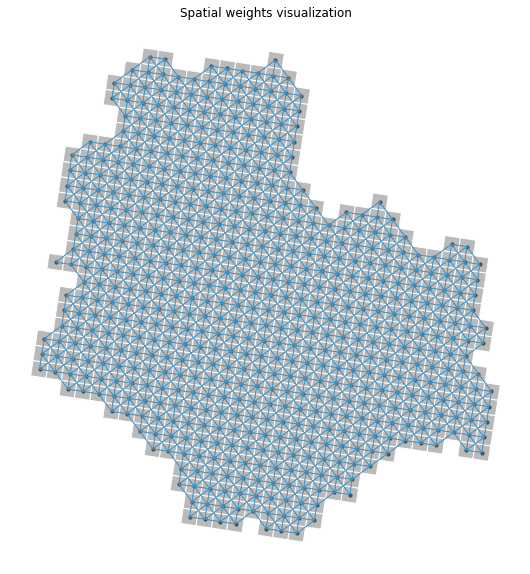

C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


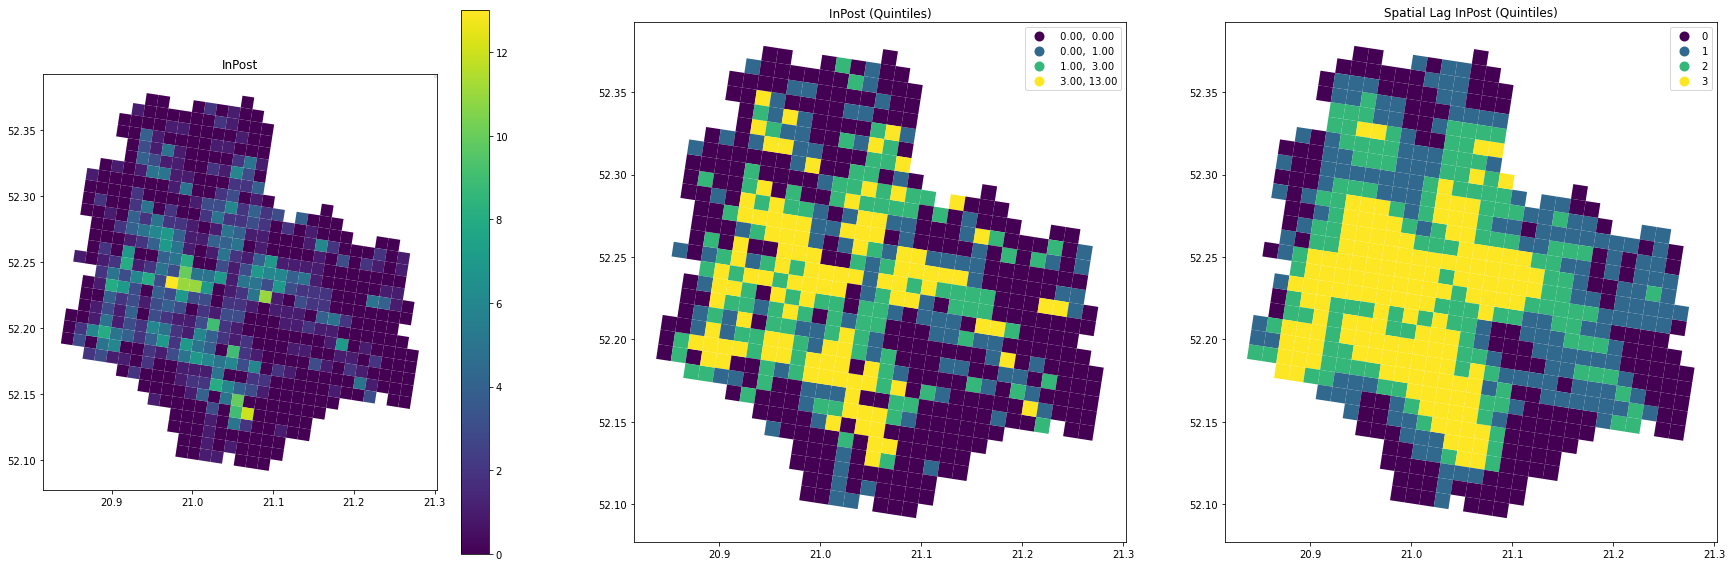

In [8]:
spatial_seda(df_warszawa, "powiat Warszawa", 1)

#### Global Spatial Autocorrelation analysis

Then we move to the global spatial autocorrelation analysis. 

First we checked Moran's I statistic. Based on its p-value and statistic we can claim that there is positive spatial autocorrelation in the InPost data. We utilized also Moran Scatterplot to visualize the relation between areas. 

Then we checked whether Geary's statistic also indicates positive spatial autocorrelation, and based on its output we also claim that there is spatial autocorrelation in the data. 

Last but not least we applied Joint Count test for binary case (85 percentile as as cut-off point for dependent variable) and it also indicated that the number of InPost's pick-up points in grids are not randomly distributed in case of spatial term.

Moran's I 0.4020725532811403 
p-value of I under normality assumption 0.0 
p-value based on permutations 0.001


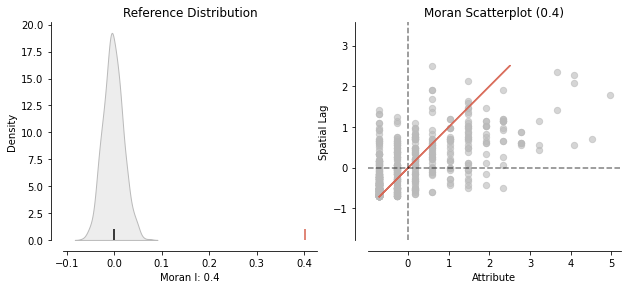

Geary's:  0.5984578850664994 p-value: 0.001


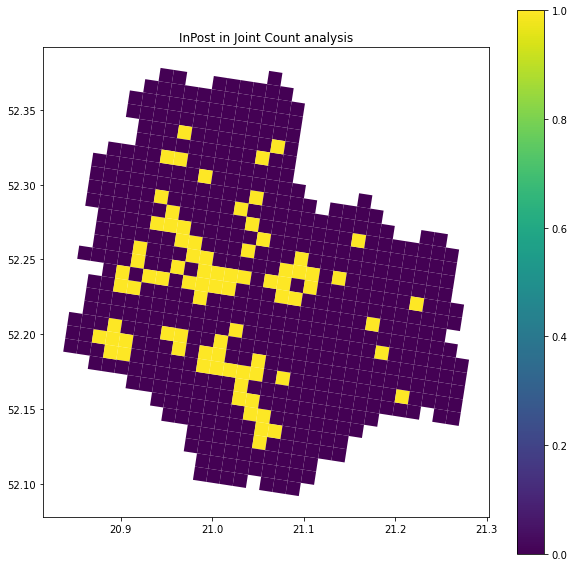

Joint count bb pvalue 0.001 ;JC bw pvalue 1.0


In [14]:
spatial_seda(df_warszawa, "powiat Warszawa", 2)

#### Local Spatial Autocorrelation analysis

In the next step we utilized Moran Local measure (LISA) to obtain Moran Local Scatterplot. In Python `pysal` package it allow us to visualize Hot Spots (HH), Cold Spots (LL), and Spatial Outliers (HL, LH). Again we see that city center is the Hot Spot. It is evident that bedroom suburbs are classified as Cold Spots. HL spots (so called diamons) occur in or near bedroom suburbs, while LH spots occur near the city center. This conclusions are quite intuitive.

Then we ploted bivariate moran scatterplot for our logistic companies. This illustrates that relationships between these variables do indeed exist.

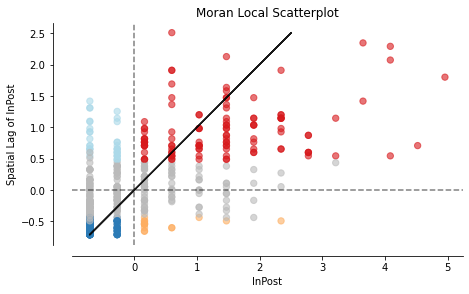

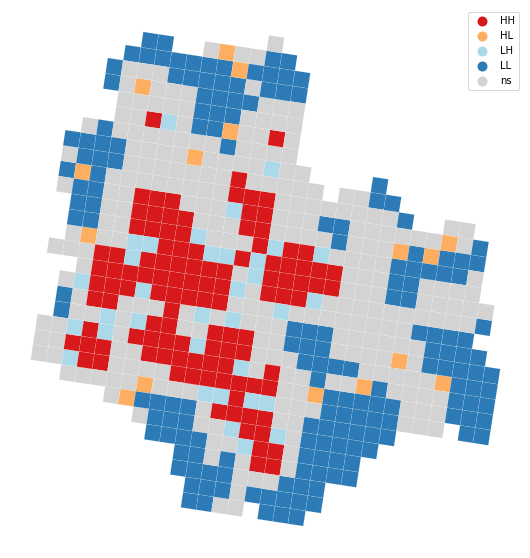

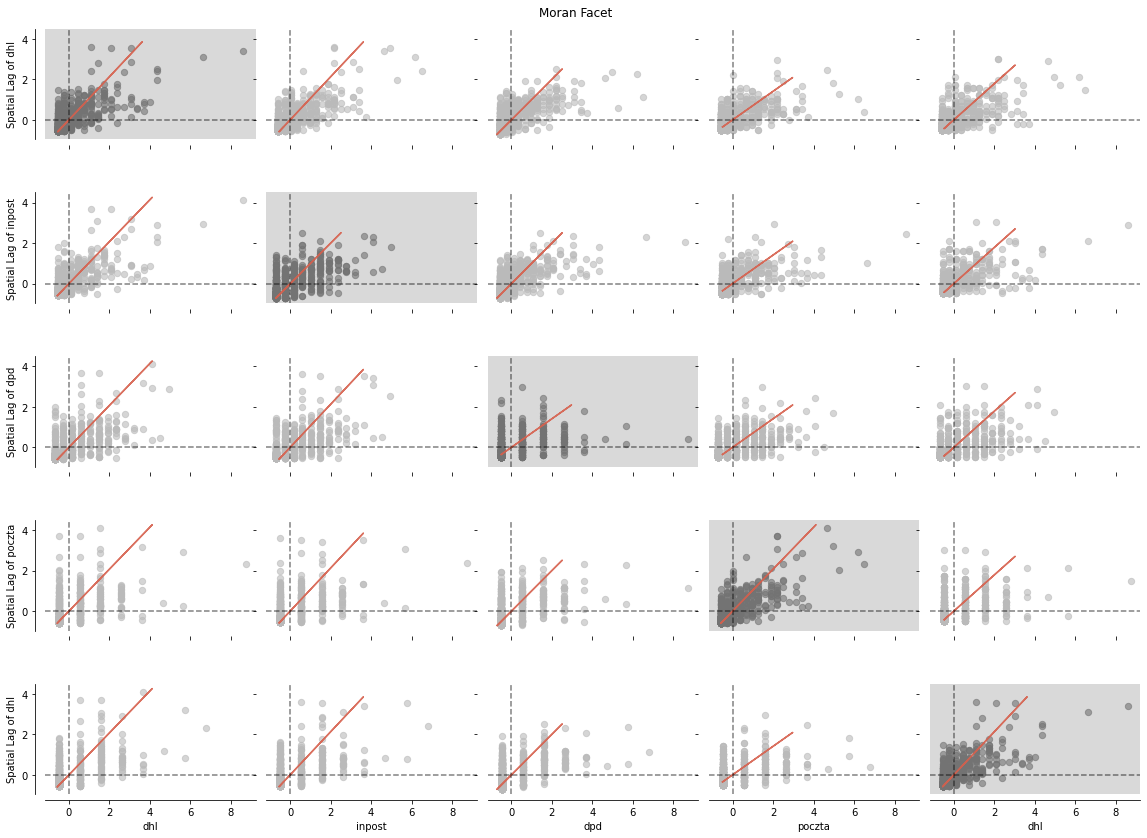

In [15]:
spatial_seda(df_warszawa, "powiat Warszawa", 3)

#### Tessellation and entropy analysis

**Importantly, here we switched to point data from the grid data!!!**

The final piece of SEDA is an attempt to use the tessellation mechanism to visualize and examine the agglomeration per each logistic company. Visualizations presented below perfectly show InPost pick-up points concentration and leads to the same conclusions as previously! 

Then we utilized Shannon entropy and Relative H entropy to analyse agglomeration per each logistic company. We can see that DHL and Poczta Polska are top agglomerated companies. InPost is in the middle of the ranking. It seems to be the right place because too high agglomeration has a negative impact on accessibility in all parts of Warsaw.

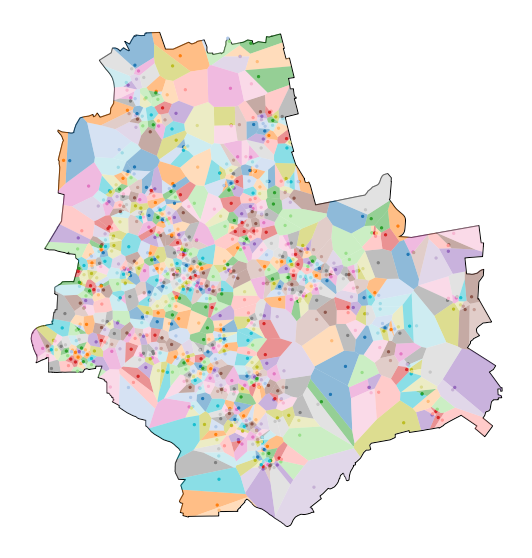

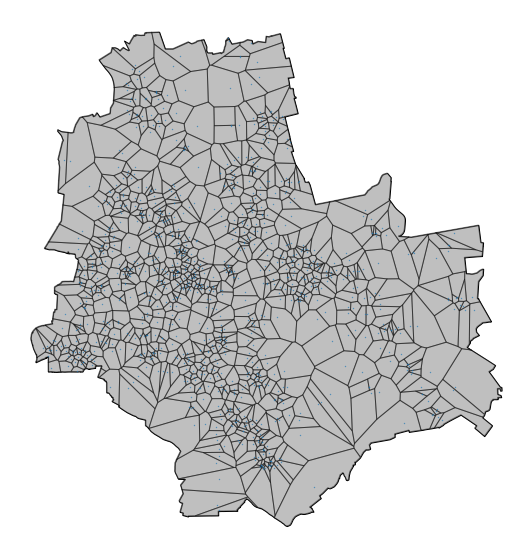

,Shannon entropy,Relative H entropy
dpd,5.092312,0.900897
fedex,2.666880,0.922677
inpost,6.198246,0.905680
poczta,6.059140,0.864541
ruch,4.876571,0.870487
ups,4.381173,0.876723
dhl,5.905179,0.856863


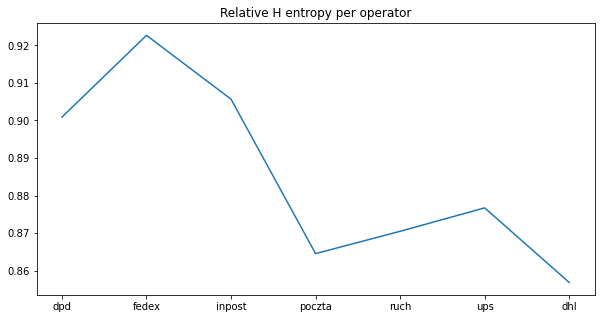

In [16]:
spatial_seda(df_warszawa, "powiat Warszawa", 4)

### Cracow

#### Spatial weights analysis, Spatial Lag analysis

In the Cracow case weight matrix based on QUEEN contiguity works also better that ROOK (in econometric part). Based on the first plot we see that it was correctly calculated. 

Then we analyze visualization of InPost in continuous, quintiles and spatial lag quintiles manor. We can clearly see that pick-up points are located strictly in the city center. The lowest level of coverage is in the eastern and western parts of the city (with an emphasis on the eastern).  

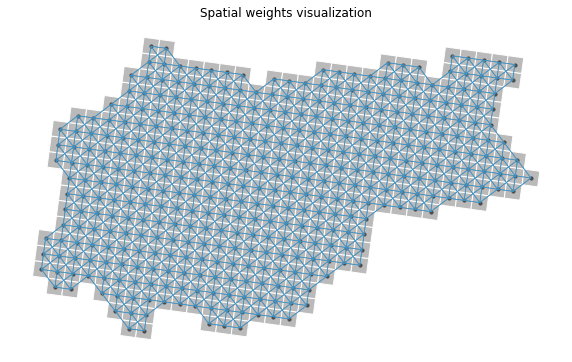

C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


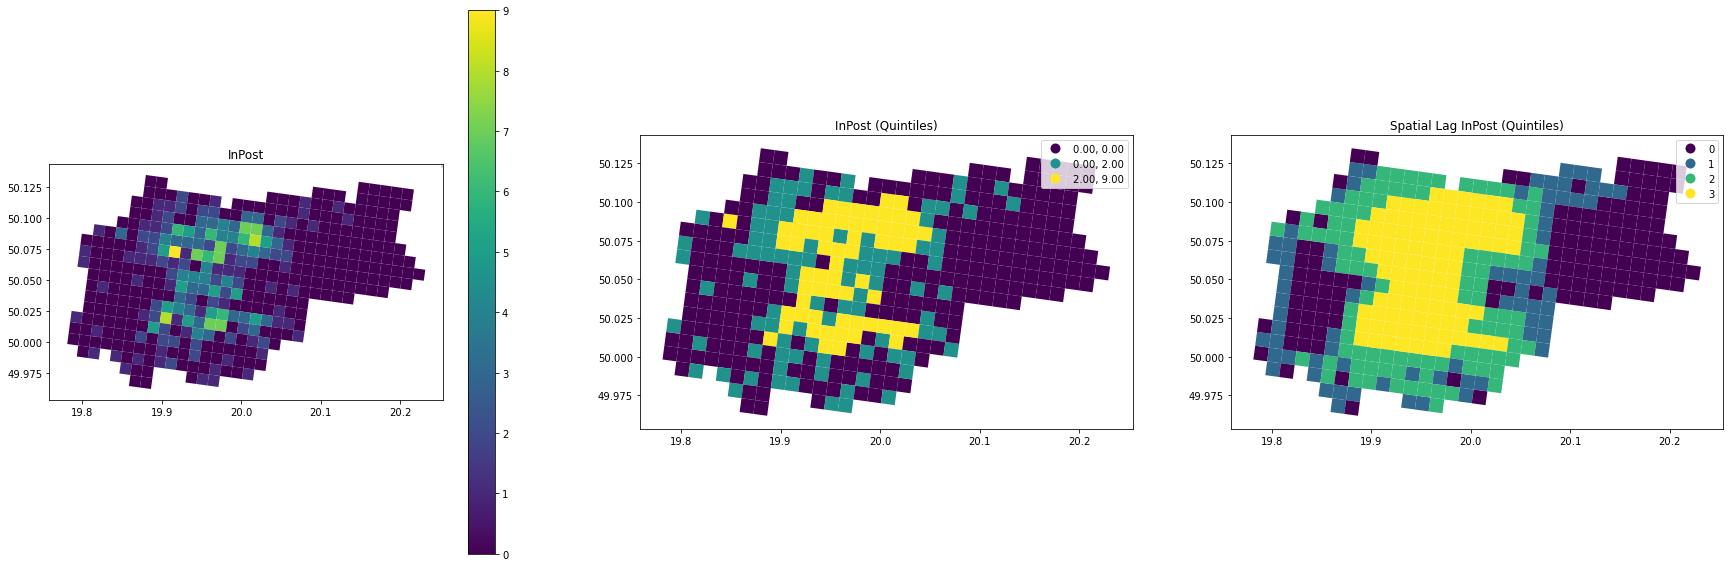

In [10]:
spatial_seda(df_krakow, "powiat Kraków", 1)

#### Global Spatial Autocorrelation analysis

Global Spatial Autocorrelation measures like Moran's I and Geary's indicates positive spatial autocorrelation (statistically significant) in the InPost data. Also Joint Count shows spatial autocorrelation for InPost pickup-points.

Moran's I 0.521756272206774 
p-value of I under normality assumption 0.0 
p-value based on permutations 0.001


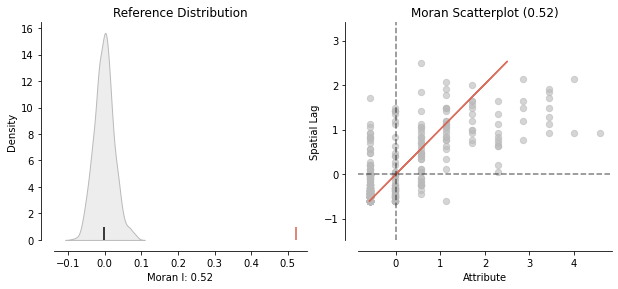

Geary's:  0.47879474971718783 p-value: 0.001


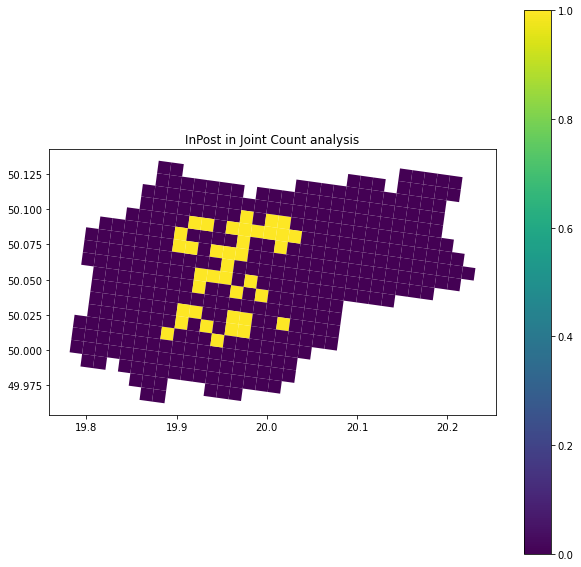

Joint count bb pvalue 0.001 ;JC bw pvalue 1.0


In [11]:
spatial_seda(df_krakow, "powiat Kraków", 2)

#### Local Spatial Autocorrelation analysis

LISA allowed us to visualize HH, LL, HL, LH spots in the Cracow. Based on it we can claim that all HH are located in the city center. There are only 2 HL (diamonds). Wester and Easter part of the Cracow are definitely LL. 

Then we ploted bivariate moran scatterplot for our logistic companies. This illustrates that relationships between these variables do indeed exist.

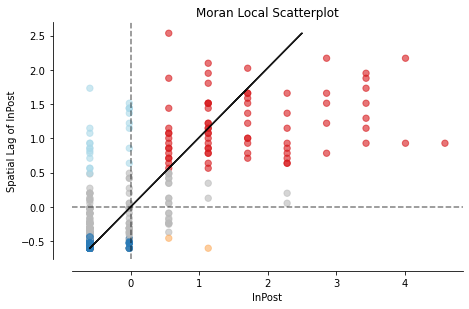

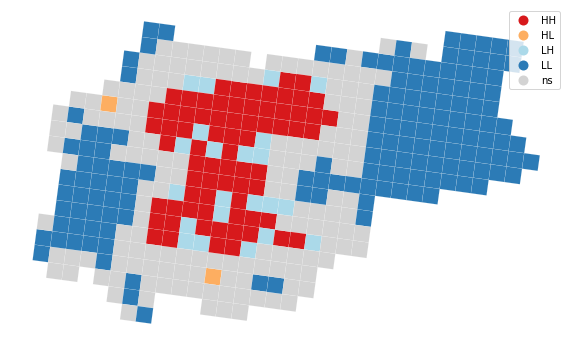

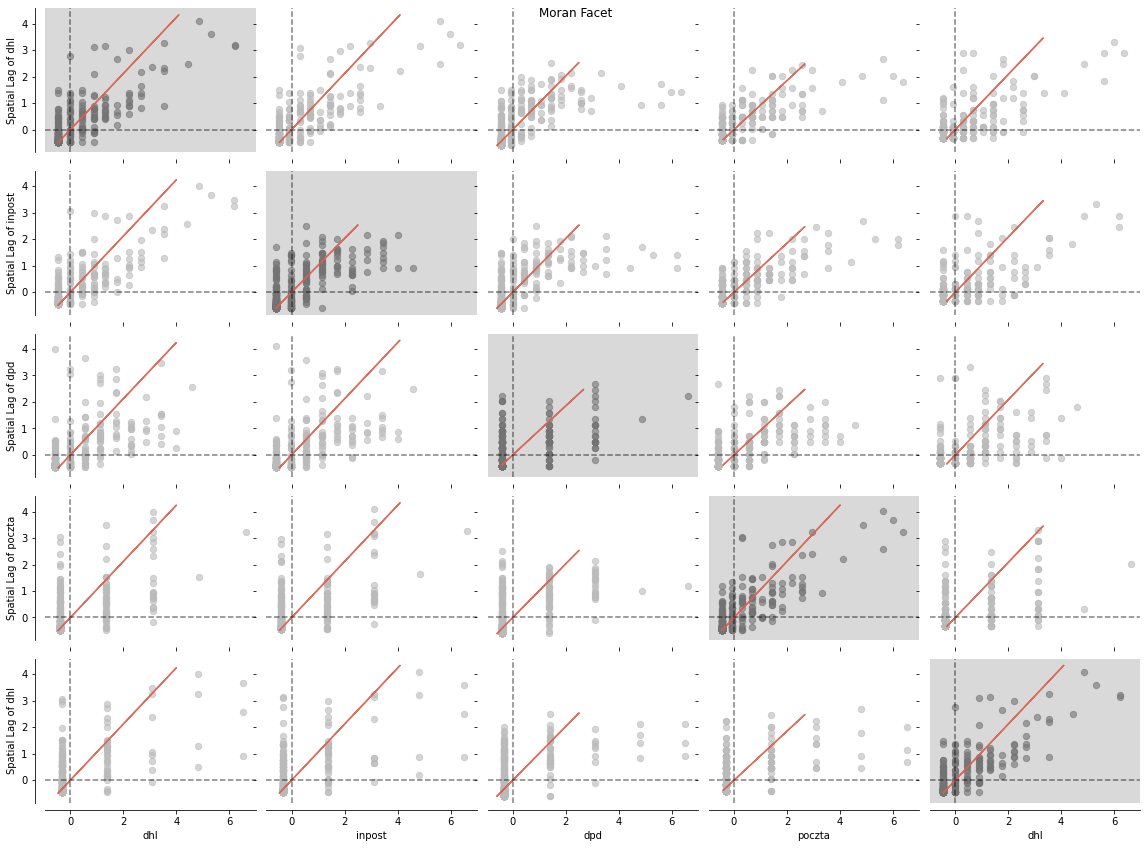

In [12]:
spatial_seda(df_krakow, "powiat Kraków", 3)

#### Tessellation and entropy analysis

**Importantly, here we switched to point data from the grid data!!!**

Points visualization using tessellation technique presented below perfectly show InPost pick-up points concentration  in the city center, thus it leads to the same conclusions as previously! 

Then we utilized Shannon entropy and Relative H entropy to analyse agglomeration per each logistic company. We can see that Ruch, Poczta Polska  and DHL are top agglomerated companies. InPost again is in the middle of the ranking. It seems to be the right place because too high agglomeration has a negative impact on accessibility in all parts of Warsaw.

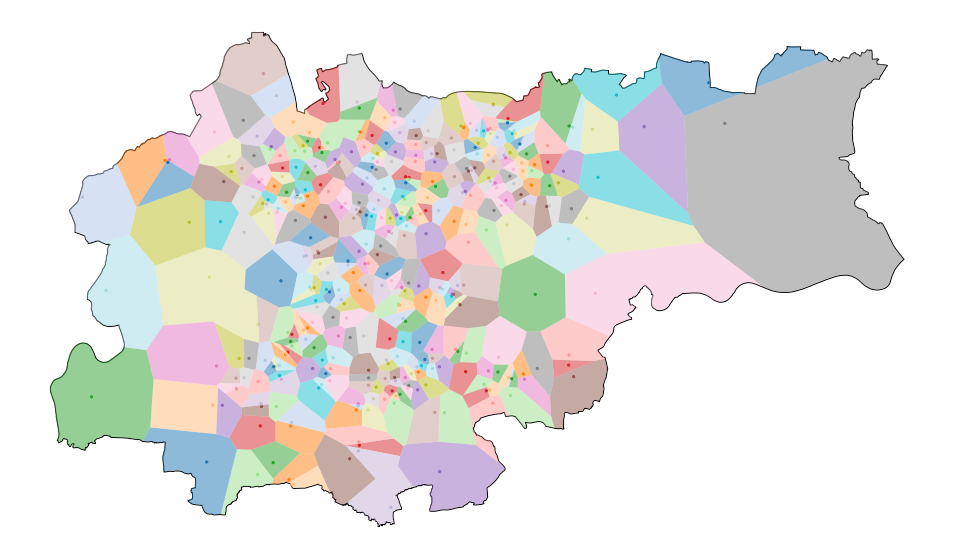

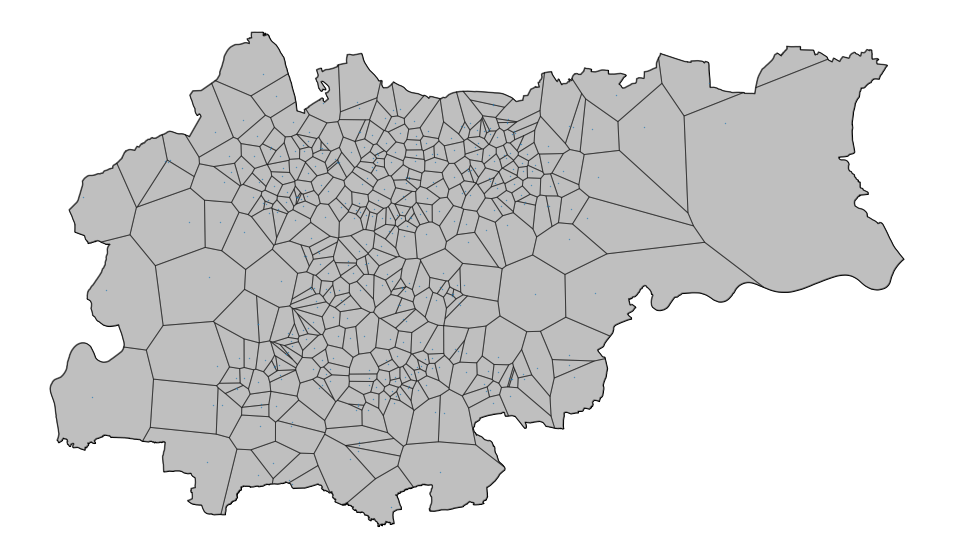

,Shannon entropy,Relative H entropy
dpd,3.531301,0.784767
fedex,2.181277,0.850417
inpost,4.854113,0.814311
poczta,4.703335,0.763641
ruch,3.160325,0.741394
ups,3.216875,0.818163
dhl,4.601693,0.767403


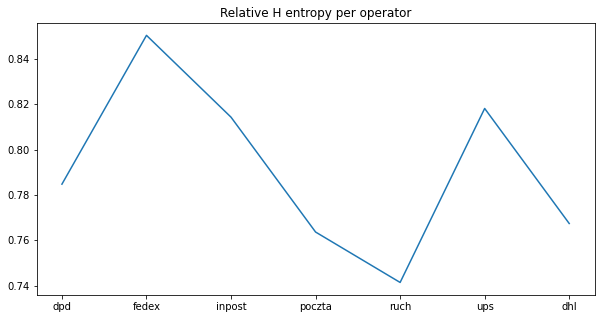

In [13]:
spatial_seda(df_krakow, "powiat Kraków", 4)

# 7. Spatial dependence models

**Warning! This chapter is realized in R**

In this chapter we create spatial dependence econometric models to answer our research hypothesis. We believe based on spatial autocorrelation tests (performed in previous chapters) that spatial autocorrelation exists in the analyzed phenomenon. We create models for Warsaw and Cracow separately. We utilize here 1km2 grid!

Generally, we specific following functional form of the models:
$inpost_i = \alpha * \text{logistic_companies}_i + \beta * \text{demographic_variables}_i + \gamma * \text{point_of_interest_variables}_i + \theta * \text{spatial_terms}_i + \epsilon$, 

where:

* logistic_companies cover: DHL, DPD, Fedex, Poczta Polska, Ruch and UPS
* demographic_variables cover: total density, density age 0-14, density age 15-64, density age 65-...,  total mail density, total female density, female density age 0-14, female density age 15-64, female density age 65-..., male density age 0-14, male density age 15-64, male density age 65-..., feminization ratio
* point_of_interest_variables cover: buildings, shops, parks, forests, schools, railways, cycleways, parkings, crossings, bus stops

Obviously, a significant proportion of these variables will be removed from the final model due to high co-linearity or statistical insignificance, however, based on the literature and our intuition, we assume that at least 1-2 variables from each category will ultimately be significant. 

Our expectations for the results are as follows (taking into account the research hypotheses). Based on the visual analysis of spatial data carried out in the previous chapters of this work, it seems to us that InPost has deployed parcel pick-up points in accordance with the competition. Therefore, we expect the variables in the logistic_companies category to be significant and have a positive sign. In addition, it seems to us that the control variables (groups: demographic_variables, point_of_interest_variables) should also be important in the models and their sign should follow the logic: the more shops in the grid, the more parcel machines, the greater the afforestation, the fewer parcel machines, the more bus stops the more parcel machines, the higher the population density, the more parcel machines etc. In addition, we believe that extending the OLS model with spatial components is a good idea and models that take into account spillover effects will be econometrically better. We apply these expectations to both Warsaw and Cracow.

We adopted the following modeling strategy due to the complexity of the problem:

1. OLS model estimation to establish an initial functional form that is free of collinearity (VIF statistic) of the variables along with model diagnostics.
2. Estimation of the final OLS model using Stepwise Regression procedure (both directions).
3. Estimation of spatial models with 3, 2, 1 spatial components (using obtimate functional form from point 2).
4. Comparing the statistical properties of the models from step 3 and selecting the target model. We look for model with significant spatial components, highest number of significant variables and minimum AIC (we also take into account BIC).
5. For the obtimate model in terms of spatial components, we test other combinations of variables using the general to specific (LSE) procedure. 
6. Interpret the results of the model from point 5 


We covered all possible options to improve the models:
-	Changing spatial components (done - all possible components tried)
-	Changing the spatial weights matrix (done - QUEEN and ROOK tested)
-	Changing variables in the model (done - general to specific approach to make a choice for OLS and then infer based on it)

We set 10% significance level!

## Import dependencies

In [72]:
library(rgdal)
library(spdep)
library(tidyverse)
library(car)
library(lmtest)
library(arules)
library(spatialreg)
library(texreg)
library(stargazer)

## Models for Warsaw

### Data loading, spatial transformations and additional feature engineering

In [2]:
df <- readOGR("../datasets/preprocessed_data/df_warszawa.shp")
df_data <- read.csv("../datasets/preprocessed_data/df_warszawa.csv")
df <- spTransform(df, CRS("+proj=longlat +ellps=GRS80 +no_defs"))
df.cont.nb <- poly2nb(as(df, "SpatialPolygons"), queen=TRUE) #QUEEN but ROOK was tried!
df.cont.listw <- nb2listw(df.cont.nb, style="W")

OGR data source with driver: ESRI Shapefile 
Source: "D:\spatial_econometric_project\datasets\preprocessed_data\df_warszawa.shp", layer: "df_warszawa"
with 601 features
It has 31 fields
Integer64 fields read as strings:  grid_index 


In [73]:
cat(colnames(df_data))

grid_index geometry dhl dpd fedex inpost poczta ruch ups tot tot_0_14 tot_15_64 tot_65__ tot_male tot_fem male_0_14 male_15_64 male_65__ fem_0_14 fem_15_64 fem_65__ fem_ratio buildings shops parks forests schools railways cycleways parkings crossings bus_stops

We investigate again correlation between logistic companies. We can clearly see that Poczta Polska is highly collinear with other variables so we will remove it from the further analysis. The rest variables seems to be ok.

In [3]:
stats::cor(df_data %>% select('dhl', 'dpd', 'fedex', 'inpost', 'poczta', 'ruch', 'ups'))

,dhl,dpd,fedex,inpost,poczta,ruch,ups
dhl,1.0000000,0.6277199,0.18363265,0.7380562,0.9238711,0.6356515,0.53454845
dpd,0.6277199,1.0000000,0.13532748,0.5657193,0.6875670,0.5941321,0.43918066
fedex,0.1836326,0.1353275,1.00000000,0.2048367,0.1740457,0.1312876,0.08168199
inpost,0.7380562,0.5657193,0.20483665,1.0000000,0.7411384,0.6494003,0.53922648
poczta,0.9238711,0.6875670,0.17404573,0.7411384,1.0000000,0.7454525,0.57380202
ruch,0.6356515,0.5941321,0.13128761,0.6494003,0.7454525,1.0000000,0.53308523
ups,0.5345484,0.4391807,0.08168199,0.5392265,0.5738020,0.5330852,1.00000000


Potential enhancement of the features.

In [4]:
df$tot_0_14 <- df$tot_0_14/df$tot
df$tot_15_64 <- df$tot_15_64/df$tot
df$tot_65__ <- df$tot_65__/df$tot

df$male_0_14 <- df$male_0_14/df$tot_male 
df$male_15_64 <- df$male_15_64/df$tot_male 
df$male_65__ <- df$male_65__/df$tot_male 

df$fem_0_14 <- df$fem_0_14/df$tot_fem 
df$fem_15_64 <- df$fem_15_64/df$tot_fem 
df$fem_65__ <- df$fem_65__/df$tot_fem 

### OLS models

Based on many tries we decided that below formula is the most appropriate general formula for the given problem. We removed Poczta Polska from logistic companies, we left total density and feminization ratio in case of demographic data and finally we leave all data regarding points of interest.

In [5]:
formula = inpost ~ dhl + dpd + fedex + ruch + ups +
            log(tot + 1) + fem_ratio + 
            buildings + shops + parks + forests + schools + 
            railways + cycleways + parkings + crossings + bus_stops

We estimate OLS model and we perform its diagnostics. We see that nearly 50% of the variables are significant (2 or more per each category of data). We do not have now high collinearity. However this model did not pass Ramsey and Breusch–Pagan test so the functional form is wrong and we have got heteroscedasticity in the errors. It occurred that at the level of 10% significance our residuals are spatially dependent!

In [6]:
ols <- lm(formula, data=df)
summary(ols)
car::vif(ols)
bptest(ols) 
resettest(ols, power=2, type="regressor")
lm.morantest(ols, df.cont.listw) 


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6926 -0.5928 -0.1367  0.3983  5.4677 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.095e-01  1.768e-01  -0.619 0.536066    
dhl           2.425e-01  3.221e-02   7.529 1.95e-13 ***
dpd           4.465e-02  7.660e-02   0.583 0.560192    
fedex         4.634e-01  3.063e-01   1.513 0.130902    
ruch          3.813e-01  8.948e-02   4.262 2.37e-05 ***
ups           3.945e-01  1.120e-01   3.521 0.000463 ***
log(tot + 1)  1.909e-01  3.953e-02   4.830 1.75e-06 ***
fem_ratio    -4.774e-03  2.312e-03  -2.065 0.039352 *  
buildings    -5.622e-05  9.314e-04  -0.060 0.951885    
shops        -3.495e-03  9.629e-02  -0.036 0.971055    
parks        -5.541e-02  1.443e-02  -3.839 0.000137 ***
forests      -6.320e-03  5.571e-03  -1.134 0.257150    
schools       7.159e-02  1.838e-02   3.895 0.000110 ***
railways      4.179e-03  3.056e-03   1.368 0.171990    
cycleways  

dhl          dpd        fedex         ruch          ups log(tot + 1) 
    3.430740     1.959789     1.069884     2.614402     1.661937     3.756089 
   fem_ratio    buildings        shops        parks      forests      schools 
    2.227054     1.140331     1.765262     1.431213     1.164145     3.224955 
    railways    cycleways     parkings    crossings    bus_stops 
    1.243783     1.804344     3.549422     4.525842     1.036397


	studentized Breusch-Pagan test

data:  ols
BP = 141.3, df = 17, p-value < 2.2e-16



	RESET test

data:  ols
RESET = 5.2474, df1 = 17, df2 = 566, p-value = 7.66e-11



	Global Moran I for regression residuals

data:  
model: lm(formula = formula, data = df)
weights: df.cont.listw

Moran I statistic standard deviate = 1.6831, p-value = 0.04618
alternative hypothesis: greater
sample estimates:
Observed Moran I      Expectation         Variance 
    0.0291485488    -0.0063435194     0.0004446764 


Then we applied Stepwise Regression procedure to obtain the most significant model starting from the function form defined above.

In [7]:
intercept_only <- lm(inpost~1, data=df)
all <- lm(formula, data=df)
both <- step(intercept_only, direction='both', scope=formula(all), trace=0)
both


Call:
lm(formula = inpost ~ dhl + schools + log(tot + 1) + ruch + parks + 
    ups + crossings + fem_ratio + fedex, data = df)

Coefficients:
 (Intercept)           dhl       schools  log(tot + 1)          ruch  
   -0.144470      0.258789      0.075243      0.192578      0.379413  
       parks           ups     crossings     fem_ratio         fedex  
   -0.058957      0.379756      0.004715     -0.004973      0.482499  


Based on Stepwise Regression we obtained final formula of the model and we are able to run our final OLS with diagnostic part. We see that nearly all variables in the model are significant (of course due to the heteroscedasticity we use biased error variance estimator - we omitted application of the robust matrix due to lack of time). There is no collinearity in the model, but again we did not pass Ramsey and B-P tests. What is more residuals from the model are still spatially dependent. In case of  interpretation we can see that: logistic companies have positive sign as expected; the greater the total density the more InPost pick-up points are stated; fem_ratio results is interesting because its sign is negative (more woman less pick-up points, quite spurious?!), in addition, the negative relationship between parks and pickup points is interesting but maybe intuitive.

In [8]:
formula = inpost ~ dhl + schools + log(tot + 1) + ruch + parks + 
    ups + crossings + fem_ratio + fedex
ols <- lm(formula, data=df)
summary(ols)
cat("AIC", AIC(ols))
car::vif(ols)
bptest(ols) 
resettest(ols, power=2, type="regressor")
lm.morantest(ols, df.cont.listw) 


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9841 -0.6204 -0.1485  0.3748  5.7877 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.144470   0.171182  -0.844 0.399034    
dhl           0.258789   0.028132   9.199  < 2e-16 ***
schools       0.075243   0.015650   4.808 1.94e-06 ***
log(tot + 1)  0.192578   0.039205   4.912 1.17e-06 ***
ruch          0.379413   0.081565   4.652 4.07e-06 ***
parks        -0.058957   0.013272  -4.442 1.06e-05 ***
ups           0.379756   0.108958   3.485 0.000528 ***
crossings     0.004715   0.002238   2.106 0.035612 *  
fem_ratio    -0.004973   0.002298  -2.164 0.030876 *  
fedex         0.482499   0.303603   1.589 0.112541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.303 on 591 degrees of freedom
Multiple R-squared:  0.683,	Adjusted R-squared:  0.6782 
F-statistic: 141.5 on 9 and 591 DF,  p-value: < 2.2e-16


AIC 2035.98

dhl      schools log(tot + 1)         ruch        parks          ups 
    2.630252     2.349016     3.712366     2.182872     1.216059     1.579691 
   crossings    fem_ratio        fedex 
    3.563303     2.212064     1.055896


	studentized Breusch-Pagan test

data:  ols
BP = 133.08, df = 9, p-value < 2.2e-16



	RESET test

data:  ols
RESET = 6.8392, df1 = 9, df2 = 582, p-value = 2.223e-09



	Global Moran I for regression residuals

data:  
model: lm(formula = formula, data = df)
weights: df.cont.listw

Moran I statistic standard deviate = 1.4688, p-value = 0.07094
alternative hypothesis: greater
sample estimates:
Observed Moran I      Expectation         Variance 
    0.0268763136    -0.0042751978     0.0004497972 


### Spatial models with 3, 2, or 1 spatial components

Now we moved to the estimation of the spatial models. In the first step we estimate all possible models due to spatial terms and then we analyze which model is reasonable (based on number of significant variables, significant spatial terms and AIC+BIC).

In [9]:
GNS <- sacsarlm(formula, data=df, listw=df.cont.listw, type="sacmixed", method="LU")
summary(GNS)


Call:sacsarlm(formula = formula, data = df, listw = df.cont.listw, 
    type = "sacmixed", method = "LU")

Residuals:
     Min       1Q   Median       3Q      Max 
-4.65144 -0.59387 -0.10078  0.39765  5.29613 

Type: sacmixed 
Coefficients: (numerical Hessian approximate standard errors) 
                   Estimate Std. Error z value  Pr(>|z|)
(Intercept)      -0.3096406  0.3759817 -0.8236  0.410194
dhl               0.2228032  0.0321699  6.9258 4.335e-12
schools           0.0805577  0.0174675  4.6119 3.991e-06
log(tot + 1)      0.1356923  0.0439068  3.0905  0.001998
ruch              0.4126336  0.0829722  4.9732 6.587e-07
parks            -0.0388209  0.0159319 -2.4367  0.014823
ups               0.3522209  0.1076515  3.2719  0.001068
crossings         0.0067908  0.0026043  2.6076  0.009119
fem_ratio        -0.0038325  0.0023313 -1.6440  0.100181
fedex             0.6562935  0.3025839  2.1690  0.030085
lag.dhl           0.1202994  0.1140963  1.0544  0.291715
lag.schools      -0.04096

In [10]:
SAC <- sacsarlm(formula, data=df, listw=df.cont.listw)
summary(SAC)


Call:sacsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.77462 -0.60148 -0.15324  0.41148  5.76569 

Type: sac 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.1721734  0.1729029 -0.9958 0.3193566
dhl           0.2477643  0.0287298  8.6239 < 2.2e-16
schools       0.0723287  0.0158275  4.5698 4.881e-06
log(tot + 1)  0.1809632  0.0391950  4.6170 3.893e-06
ruch          0.3864329  0.0807050  4.7882 1.683e-06
parks        -0.0596580  0.0133850 -4.4571 8.308e-06
ups           0.3753236  0.1079086  3.4782 0.0005049
crossings     0.0041734  0.0023173  1.8010 0.0717103
fem_ratio    -0.0047245  0.0022738 -2.0778 0.0377256
fedex         0.4830808  0.2999343  1.6106 0.1072621

Rho: 0.074328
Asymptotic standard error: 0.064193
    z-value: 1.1579, p-value: 0.24691
Lambda: 0.024735
Asymptotic standard error: 0.10089
    z-value: 0.24518, p-value: 0.80632

LR test 

In [11]:
SDM <- errorsarlm(formula, data=df, listw=df.cont.listw, etype="mixed")
summary(SDM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw, 
    etype = "mixed")

Residuals:
      Min        1Q    Median        3Q       Max 
-4.757531 -0.597547 -0.095155  0.389789  5.263433 

Type: error 
Coefficients: (asymptotic standard errors) 
                   Estimate Std. Error z value  Pr(>|z|)
(Intercept)      -0.4234932  0.4373072 -0.9684  0.332839
dhl               0.2223463  0.0310939  7.1508 8.629e-13
schools           0.0800192  0.0169938  4.7087 2.493e-06
log(tot + 1)      0.1461070  0.0423166  3.4527  0.000555
ruch              0.3927065  0.0797844  4.9221 8.562e-07
parks            -0.0423316  0.0153067 -2.7656  0.005683
ups               0.3401743  0.1063629  3.1982  0.001383
crossings         0.0068412  0.0025220  2.7126  0.006676
fem_ratio        -0.0043878  0.0022628 -1.9391  0.052495
fedex             0.6458184  0.3077289  2.0987  0.035847
lag.dhl           0.2297732  0.0727347  3.1591  0.001583
lag.schools      -0.0208795  0.0358180 -0.5829  0.55

In [12]:
SDEM <- errorsarlm(formula, data=df, listw=df.cont.listw, etype="emixed")
summary(SDEM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw, 
    etype = "emixed")

Residuals:
      Min        1Q    Median        3Q       Max 
-4.757531 -0.597547 -0.095155  0.389789  5.263433 

Type: error 
Coefficients: (asymptotic standard errors) 
                   Estimate Std. Error z value  Pr(>|z|)
(Intercept)      -0.4234932  0.4373072 -0.9684  0.332839
dhl               0.2223463  0.0310939  7.1508 8.629e-13
schools           0.0800192  0.0169938  4.7087 2.493e-06
log(tot + 1)      0.1461070  0.0423166  3.4527  0.000555
ruch              0.3927065  0.0797844  4.9221 8.562e-07
parks            -0.0423316  0.0153067 -2.7656  0.005683
ups               0.3401743  0.1063629  3.1982  0.001383
crossings         0.0068412  0.0025220  2.7126  0.006676
fem_ratio        -0.0043878  0.0022628 -1.9391  0.052495
fedex             0.6458184  0.3077289  2.0987  0.035847
lag.dhl           0.2297732  0.0727347  3.1591  0.001583
lag.schools      -0.0208795  0.0358180 -0.5829  0.5

In [13]:
SEM <- errorsarlm(formula, data=df, listw=df.cont.listw)
summary(SEM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.81062 -0.60202 -0.18188  0.39096  5.84370 

Type: error 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.1301997  0.1734180 -0.7508  0.452782
dhl           0.2530099  0.0283798  8.9151 < 2.2e-16
schools       0.0758115  0.0158034  4.7972 1.609e-06
log(tot + 1)  0.1823923  0.0394561  4.6227 3.788e-06
ruch          0.3885116  0.0808737  4.8039 1.556e-06
parks        -0.0560362  0.0134822 -4.1563 3.234e-05
ups           0.3819184  0.1078447  3.5414  0.000398
crossings     0.0050275  0.0022632  2.2214  0.026325
fem_ratio    -0.0046251  0.0022768 -2.0314  0.042218
fedex         0.4883269  0.2992225  1.6320  0.102682

Lambda: 0.097709, LR test value: 1.5928, p-value: 0.20693
Asymptotic standard error: 0.074295
    z-value: 1.3152, p-value: 0.18846
Wald statistic: 1.7296, p-value: 0.18846

Log likeli

In [20]:
SAR <- lagsarlm(formula, data=df, listw=df.cont.listw)
summary(SAR)


Call:lagsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.79287 -0.60136 -0.15215  0.41224  5.74634 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.1786277  0.1706989 -1.0464 0.2953537
dhl           0.2478015  0.0282846  8.7610 < 2.2e-16
schools       0.0717215  0.0156378  4.5864 4.509e-06
log(tot + 1)  0.1821701  0.0389206  4.6806 2.861e-06
ruch          0.3845874  0.0806541  4.7684 1.857e-06
parks        -0.0605122  0.0132188 -4.5778 4.700e-06
ups           0.3736604  0.1078399  3.4650 0.0005303
crossings     0.0040075  0.0022673  1.7675 0.0771456
fem_ratio    -0.0047848  0.0022728 -2.1052 0.0352740
fedex         0.4814659  0.3002205  1.6037 0.1087785

Rho: 0.084055, LR test value: 2.8325, p-value: 0.092373
Asymptotic standard error: 0.048482
    z-value: 1.7337, p-value: 0.082964
Wald statistic: 3.0059, p-value: 0.082964

Log likelihood

In [15]:
SLX <- lmSLX(formula, data=df, listw=df.cont.listw)
summary(SLX)


Call:
lm(formula = formula(paste("y ~ ", paste(colnames(x)[-1], collapse = "+"))), 
    data = as.data.frame(x), weights = weights)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8073 -0.5970 -0.0874  0.3925  5.2600 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.419836   0.434336  -0.967 0.334137    
dhl               0.223368   0.031732   7.039 5.47e-12 ***
schools           0.080110   0.017349   4.618 4.78e-06 ***
log.tot...1.      0.146202   0.043149   3.388 0.000751 ***
ruch              0.392732   0.081145   4.840 1.67e-06 ***
parks            -0.041995   0.015633  -2.686 0.007431 ** 
ups               0.340498   0.108101   3.150 0.001717 ** 
crossings         0.006810   0.002574   2.645 0.008378 ** 
fem_ratio        -0.004387   0.002300  -1.907 0.056960 .  
fedex             0.647918   0.311972   2.077 0.038254 *  
lag.dhl           0.226797   0.073165   3.100 0.002030 ** 
lag.schools      -0.021032   0.035888  -0.586 0.55

Based on the above outputs we can clearly state that the best spatial model is **SAR (Spatial Lag Model)** - significant spatial terms and many significant variables.

Then we compare models BIC and AIC. We can clearly see that the best model in comparison to the OLS is SAR, however its BIC is greater that OLS BIC. In case of AIC which is more important the best model is SLX. However based on its output we can claim that SAR is still better in case of econometric inference.

In [30]:
cat("ols",BIC(ols) ,'\n')
cat("GNS",BIC(GNS),'\n')
cat("SAC",BIC(SAC),'\n')
cat("SDM",BIC(SDM),'\n')
cat("SDEM",BIC(SDEM),'\n')
cat("SAR",BIC(SAR),'\n')
cat("SLX",BIC(SLX),'\n')
cat("SEM",BIC(SEM),'\n')
cat('\n')
cat("ols",AIC(ols) ,'\n')
cat("GNS",AIC(GNS),'\n')
cat("SAC",AIC(SAC),'\n')
cat("SDM",AIC(SDM),'\n')
cat("SDEM",AIC(SDEM),'\n')
cat("SAR",AIC(SAR),'\n')
cat("SLX",AIC(SLX),'\n')
cat("SEM",AIC(SEM),'\n')

ols 2084.365 
GNS 2127.256 
SAC 2094.27 
SDM 2121.4 
SDEM 2121.4 
SAR 2087.931 
SLX 2115.285 
SEM 2089.17 

ols 2035.98 
GNS 2030.487 
SAC 2037.088 
SDM 2029.029 
SDEM 2029.029 
SAR 2035.147 
SLX 2027.313 
SEM 2036.387 


Now we wanted to find better functional form for the SAR model in the general to specific procedure (LSA) done by hand, however we were not able to improve this model (our previous functional form was the best one). Residuals in the model are not autocorrelated.

In [27]:
formula_max = inpost ~ dhl + dpd + fedex + ruch + ups +
            log(tot + 1) + fem_ratio + 
            buildings + shops + parks + forests + schools + 
            railways + cycleways + parkings + crossings + bus_stops

formula_gen_to_specifc = inpost ~ dhl + fedex + ruch + ups +
            log(tot + 1) + fem_ratio + 
            parks + schools + 
            crossings

SAR_g2s<- lagsarlm(formula_gen_to_specifc, data=df, listw=df.cont.listw)
summary(SAR_g2s) #the same as previously!


Call:
lagsarlm(formula = formula_gen_to_specifc, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-4.79287 -0.60136 -0.15215  0.41224  5.74634 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.1786277  0.1706989 -1.0464 0.2953537
dhl           0.2478015  0.0282846  8.7610 < 2.2e-16
fedex         0.4814659  0.3002205  1.6037 0.1087785
ruch          0.3845874  0.0806541  4.7684 1.857e-06
ups           0.3736604  0.1078399  3.4650 0.0005303
log(tot + 1)  0.1821701  0.0389206  4.6806 2.861e-06
fem_ratio    -0.0047848  0.0022728 -2.1052 0.0352740
parks        -0.0605122  0.0132188 -4.5778 4.700e-06
schools       0.0717215  0.0156378  4.5864 4.509e-06
crossings     0.0040075  0.0022673  1.7675 0.0771456

Rho: 0.084055, LR test value: 2.8325, p-value: 0.092373
Asymptotic standard error: 0.048482
    z-value: 1.7337, p-value: 0.082964
Wald statistic: 3.0059, p-value: 0.082964

### Direct and indirect impacts

Now we calculate direct and indirect impacts of the model. And we finally analyze its output.

Let's start with logistic companies variables. We see that either in case of direct and indirect impacts all parameters for logistic companies (apart indirect Fedex) are significant (at least around 10%). Internalization effects are greater than spill-over, but still spill-over effects are significant. In case of demographic variables we claim that total population density is important variable for the model in case of direct and indirect impact (has positive sign). Feminization ratio in case of direct impact is also significant and has negative sign (it is quite non intuitive). In case of point of interest data we see that number of schools, number of parks and number of crossings are significant in the model (crossings spillover effect is not relevant) with respectively positive, negative and positive sign. We claim that it might be intuitive.

In [31]:
# distribution of total impact 
# vector of traces of powers of a spatial weights matrix
# converting censored listw to CsparseMatrix form
W.c <- as(as_dgRMatrix_listw(df.cont.listw), "CsparseMatrix") 
# the default values for the number of powers is 30
trMat<-trW(W.c, type="mult") 

SAR_imp<-impacts(SAR, tr=trMat, R=200)
summary(SAR_imp, zstats=TRUE, short=TRUE)

Impact measures (lag, trace):
                   Direct      Indirect        Total
dhl           0.248049502  0.0224925064  0.270542008
schools       0.071793286  0.0065100350  0.078303321
log(tot + 1)  0.182352374  0.0165352557  0.198887629
ruch          0.384972296  0.0349083218  0.419880618
parks        -0.060572761 -0.0054925860 -0.066065347
ups           0.374034348  0.0339164961  0.407950844
crossings     0.004011499  0.0003637527  0.004375252
fem_ratio    -0.004789587 -0.0004343077 -0.005223894
fedex         0.481947745  0.0437018122  0.525649557
Simulation results ( variance matrix):
Simulated standard errors
                  Direct     Indirect       Total
dhl          0.024577792 0.0129272070 0.028335501
schools      0.015146244 0.0039862622 0.016354111
log(tot + 1) 0.040420150 0.0102503478 0.044770293
ruch         0.088578780 0.0225102250 0.099527465
parks        0.012891407 0.0034663042 0.014522086
ups          0.113698964 0.0211674881 0.123919020
crossings    0.002284907 

## Models for Cracow

For the Cracow we applied the same procedure as for Warsaw, so we will omit here additional comments and focus only on the results.

### Data loading, spatial transformations and additional feature engineering

In [36]:
df <- readOGR("../datasets/preprocessed_data/df_krakow.shp")
df_data <- read.csv("../datasets/preprocessed_data/df_krakow.csv")
df <- spTransform(df, CRS("+proj=longlat +ellps=GRS80 +no_defs"))
df.cont.nb <- poly2nb(as(df, "SpatialPolygons"), queen=TRUE) #QUEEN but ROOK was tried!
df.cont.listw <- nb2listw(df.cont.nb, style="W")

OGR data source with driver: ESRI Shapefile 
Source: "D:\spatial_econometric_project\datasets\preprocessed_data\df_krakow.shp", layer: "df_krakow"
with 396 features
It has 31 fields
Integer64 fields read as strings:  grid_index 


In [37]:
cat(colnames(df_data))

grid_index geometry dhl dpd fedex inpost poczta ruch ups tot tot_0_14 tot_15_64 tot_65__ tot_male tot_fem male_0_14 male_15_64 male_65__ fem_0_14 fem_15_64 fem_65__ fem_ratio buildings shops parks forests schools railways cycleways parkings crossings bus_stops

In [38]:
stats::cor(df_data %>% select('dhl', 'dpd', 'fedex', 'inpost', 'poczta', 'ruch', 'ups'))

,dhl,dpd,fedex,inpost,poczta,ruch,ups
dhl,1.0000000,0.6382852,0.36539944,0.6853909,0.9543118,0.7208735,0.59141000
dpd,0.6382852,1.0000000,0.15220265,0.5960094,0.6589668,0.5101946,0.48551713
fedex,0.3653994,0.1522026,1.00000000,0.2529419,0.2965195,0.2026232,0.06370109
inpost,0.6853909,0.5960094,0.25294189,1.0000000,0.6777870,0.5782590,0.51096506
poczta,0.9543118,0.6589668,0.29651949,0.6777870,1.0000000,0.7762247,0.63031294
ruch,0.7208735,0.5101946,0.20262317,0.5782590,0.7762247,1.0000000,0.59953072
ups,0.5914100,0.4855171,0.06370109,0.5109651,0.6303129,0.5995307,1.00000000


In [39]:
df$tot_0_14 <- df$tot_0_14/df$tot
df$tot_15_64 <- df$tot_15_64/df$tot
df$tot_65__ <- df$tot_65__/df$tot

df$male_0_14 <- df$male_0_14/df$tot_male 
df$male_15_64 <- df$male_15_64/df$tot_male 
df$male_65__ <- df$male_65__/df$tot_male 

df$fem_0_14 <- df$fem_0_14/df$tot_fem 
df$fem_15_64 <- df$fem_15_64/df$tot_fem 
df$fem_65__ <- df$fem_65__/df$tot_fem 

### OLS models

In [40]:
formula = inpost ~ dhl + dpd + fedex + ruch + ups +
            log(tot + 1) + fem_ratio + 
            buildings + shops + parks + forests + schools + 
            railways + cycleways + parkings + crossings + bus_stops

In [41]:
ols <- lm(formula, data=df)
summary(ols)
car::vif(ols)
bptest(ols) 
resettest(ols, power=2, type="regressor")
lm.morantest(ols, df.cont.listw) 


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5947 -0.3813 -0.1155  0.2777  4.5829 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.488e-01  2.005e-01  -1.241 0.215269    
dhl           1.396e-01  5.011e-02   2.786 0.005611 ** 
dpd           2.882e-01  1.181e-01   2.441 0.015086 *  
fedex         3.097e-01  2.544e-01   1.217 0.224222    
ruch          1.630e-01  1.278e-01   1.275 0.202973    
ups           3.471e-01  1.401e-01   2.478 0.013649 *  
log(tot + 1)  1.759e-01  3.619e-02   4.860 1.72e-06 ***
fem_ratio    -4.458e-03  2.012e-03  -2.216 0.027299 *  
buildings     1.653e-04  1.429e-03   0.116 0.907966    
shops        -2.642e-02  4.412e-02  -0.599 0.549580    
parks        -1.900e-01  4.962e-02  -3.828 0.000151 ***
forests      -1.475e-03  4.636e-03  -0.318 0.750610    
schools       1.162e-01  2.165e-02   5.369 1.38e-07 ***
railways      3.185e-05  2.674e-03   0.012 0.990503    
cycleways  

dhl          dpd        fedex         ruch          ups log(tot + 1) 
    5.915307     2.091196     1.256635     2.593822     1.849121     2.974147 
   fem_ratio    buildings        shops        parks      forests      schools 
    1.577093     1.290085     1.618694     2.613386     1.132100     3.062693 
    railways    cycleways     parkings    crossings    bus_stops 
    1.323077     2.729662     2.212901     7.157296     2.471373


	studentized Breusch-Pagan test

data:  ols
BP = 111.49, df = 17, p-value = 6.313e-16



	RESET test

data:  ols
RESET = 7.3525, df1 = 17, df2 = 361, p-value = 1.501e-15



	Global Moran I for regression residuals

data:  
model: lm(formula = formula, data = df)
weights: df.cont.listw

Moran I statistic standard deviate = 0.86543, p-value = 0.1934
alternative hypothesis: greater
sample estimates:
Observed Moran I      Expectation         Variance 
    0.0119504900    -0.0105986646     0.0006788895 


In [45]:
intercept_only <- lm(inpost~1, data=df)
all <- lm(formula, data=df)
both <- step(intercept_only, direction='both', scope=formula(all), trace=0)

Based on Stepwise Regression we obtained final formula of the model and we are able to run our final OLS with diagnostic part. We see that nearly all variables in the model are significant (of course due to the heteroscedasticity we use biased error variance estimator - we omitted application of the robust matrix due to lack of time). There is no collinearity in the model, but again we did not pass Ramsey and B-P tests. What is more residuals from the model are not spatially dependent. In case of interpretation we can see that: logistic companies have positive sign as expected; the greater the total density the more InPost pick-up points are stated; fem_ratio results is interesting because its sign is negative (more woman less pick-up points), in addition, the negative relationship between parks and pickup points is interesting but intuitive. There is positive relationship between pickup points and schools, parkings, cycleways and bus stops. It is also intuitive!

In [46]:
formula = formula(both)
ols <- lm(formula, data=df)
summary(ols)
cat("AIC", AIC(ols))
car::vif(ols)
bptest(ols) 
resettest(ols, power=2, type="regressor")
lm.morantest(ols, df.cont.listw) 


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8521 -0.3876 -0.1289  0.2793  4.4299 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.257783   0.182849  -1.410  0.15940    
schools       0.122166   0.020100   6.078 2.93e-09 ***
dhl           0.171940   0.036511   4.709 3.48e-06 ***
parkings      0.012623   0.003094   4.080 5.48e-05 ***
cycleways     0.017109   0.004353   3.931  0.00010 ***
log(tot + 1)  0.173857   0.035023   4.964 1.04e-06 ***
parks        -0.193973   0.047366  -4.095 5.14e-05 ***
ups           0.361201   0.132367   2.729  0.00665 ** 
dpd           0.261543   0.115585   2.263  0.02421 *  
fem_ratio    -0.004469   0.001989  -2.247  0.02523 *  
bus_stops     0.036833   0.023741   1.551  0.12161    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9197 on 385 degrees of freedom
Multiple R-squared:  0.7276,	Adjusted R-squared:  0.7206 
F-stati

AIC 1070.335

schools          dhl     parkings    cycleways log(tot + 1)        parks 
    2.665270     3.169044     1.908603     2.221025     2.811209     2.403163 
         ups          dpd    fem_ratio    bus_stops 
    1.666114     2.023179     1.555686     2.254750


	studentized Breusch-Pagan test

data:  ols
BP = 115.78, df = 10, p-value < 2.2e-16



	RESET test

data:  ols
RESET = 11.021, df1 = 10, df2 = 375, p-value < 2.2e-16



	Global Moran I for regression residuals

data:  
model: lm(formula = formula, data = df)
weights: df.cont.listw

Moran I statistic standard deviate = 0.71454, p-value = 0.2374
alternative hypothesis: greater
sample estimates:
Observed Moran I      Expectation         Variance 
    0.0113325967    -0.0074311675     0.0006895866 


### Spatial models with 3, 2, or 1 spatial components

In [47]:
GNS <- sacsarlm(formula, data=df, listw=df.cont.listw, type="sacmixed", method="LU")
summary(GNS)


Call:sacsarlm(formula = formula, data = df, listw = df.cont.listw, 
    type = "sacmixed", method = "LU")

Residuals:
      Min        1Q    Median        3Q       Max 
-3.754389 -0.361068 -0.076336  0.271624  3.595976 

Type: sacmixed 
Coefficients: (numerical Hessian approximate standard errors) 
                   Estimate Std. Error z value  Pr(>|z|)
(Intercept)      -0.1892880  0.4461054 -0.4243 0.6713380
schools           0.1208664  0.0227048  5.3234 1.019e-07
dhl               0.1962639  0.0445578  4.4047 1.059e-05
parkings          0.0059313  0.0036499  1.6251 0.1041487
cycleways         0.0164590  0.0049380  3.3331 0.0008587
log(tot + 1)      0.1349492  0.0378908  3.5615 0.0003687
parks            -0.1756511  0.0494775 -3.5501 0.0003851
ups               0.4202907  0.1360512  3.0892 0.0020069
dpd               0.2239553  0.1174352  1.9071 0.0565136
fem_ratio        -0.0037182  0.0019435 -1.9132 0.0557240
bus_stops         0.0285210  0.0258514  1.1033 0.2699121
lag.schools    

In [49]:
SAC <- sacsarlm(formula, data=df, listw=df.cont.listw)
summary(SAC)


Call:sacsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
      Min        1Q    Median        3Q       Max 
-3.742778 -0.378442 -0.082933  0.251057  4.336691 

Type: sac 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.2285383  0.1732757 -1.3189  0.187193
schools       0.1173015  0.0192607  6.0902 1.128e-09
dhl           0.1519248  0.0356379  4.2630 2.017e-05
parkings      0.0117739  0.0029482  3.9935 6.510e-05
cycleways     0.0135092  0.0044227  3.0545  0.002254
log(tot + 1)  0.1480035  0.0352868  4.1943 2.737e-05
parks        -0.2093795  0.0460939 -4.5425 5.560e-06
ups           0.3964271  0.1306332  3.0347  0.002408
dpd           0.2521028  0.1130940  2.2291  0.025804
fem_ratio    -0.0042107  0.0019415 -2.1688  0.030098
bus_stops     0.0287761  0.0228751  1.2580  0.208405

Rho: 0.17813
Asymptotic standard error: 0.073257
    z-value: 2.4315, p-value: 0.015035
Lambda: -0.13362
Asymptotic standard 

In [50]:
SDM <- errorsarlm(formula, data=df, listw=df.cont.listw, etype="mixed")
summary(SDM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw, 
    etype = "mixed")

Residuals:
      Min        1Q    Median        3Q       Max 
-3.760312 -0.365729 -0.075627  0.271674  3.603924 

Type: error 
Coefficients: (asymptotic standard errors) 
                    Estimate  Std. Error z value  Pr(>|z|)
(Intercept)      -0.17645482  0.42142109 -0.4187 0.6754253
schools           0.12092515  0.02199218  5.4986 3.829e-08
dhl               0.19673895  0.04426460  4.4446 8.805e-06
parkings          0.00583431  0.00360056  1.6204 0.1051483
cycleways         0.01647383  0.00484529  3.4000 0.0006739
log(tot + 1)      0.13436113  0.03792020  3.5433 0.0003952
parks            -0.17550184  0.04948822 -3.5463 0.0003906
ups               0.41637263  0.13400568  3.1071 0.0018892
dpd               0.22459114  0.11692782  1.9208 0.0547610
fem_ratio        -0.00368692  0.00193419 -1.9062 0.0566261
bus_stops         0.02828919  0.02562449  1.1040 0.2695973
lag.schools       0.00050302

In [51]:
SDEM <- errorsarlm(formula, data=df, listw=df.cont.listw, etype="emixed")
summary(SDEM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw, 
    etype = "emixed")

Residuals:
      Min        1Q    Median        3Q       Max 
-3.760312 -0.365729 -0.075627  0.271674  3.603924 

Type: error 
Coefficients: (asymptotic standard errors) 
                    Estimate  Std. Error z value  Pr(>|z|)
(Intercept)      -0.17645482  0.42142109 -0.4187 0.6754253
schools           0.12092515  0.02199218  5.4986 3.829e-08
dhl               0.19673895  0.04426460  4.4446 8.805e-06
parkings          0.00583431  0.00360056  1.6204 0.1051483
cycleways         0.01647383  0.00484529  3.4000 0.0006739
log(tot + 1)      0.13436113  0.03792020  3.5433 0.0003952
parks            -0.17550184  0.04948822 -3.5463 0.0003906
ups               0.41637263  0.13400568  3.1071 0.0018892
dpd               0.22459114  0.11692782  1.9208 0.0547610
fem_ratio        -0.00368692  0.00193419 -1.9062 0.0566261
bus_stops         0.02828919  0.02562449  1.1040 0.2695973
lag.schools       0.0005030

In [52]:
SEM <- errorsarlm(formula, data=df, listw=df.cont.listw)
summary(SEM)


Call:errorsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.86442 -0.38388 -0.13033  0.28413  4.43792 

Type: error 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.2513907  0.1825858 -1.3768   0.16856
schools       0.1222839  0.0199770  6.1212 9.285e-10
dhl           0.1744698  0.0362854  4.8083 1.522e-06
parkings      0.0122151  0.0030927  3.9497 7.826e-05
cycleways     0.0171933  0.0043202  3.9797 6.899e-05
log(tot + 1)  0.1715968  0.0348729  4.9206 8.627e-07
parks        -0.1926390  0.0468210 -4.1144 3.882e-05
ups           0.3558354  0.1300344  2.7365   0.00621
dpd           0.2611246  0.1137346  2.2959   0.02168
fem_ratio    -0.0043836  0.0019600 -2.2365   0.02532
bus_stops     0.0363045  0.0236105  1.5376   0.12414

Lambda: 0.051161, LR test value: 0.23035, p-value: 0.63126
Asymptotic standard error: 0.09221
    z-value: 0.55483, p-value: 0.5790

In [53]:
SAR <- lagsarlm(formula, data=df, listw=df.cont.listw)
summary(SAR)


Call:lagsarlm(formula = formula, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.80128 -0.37166 -0.10260  0.24129  4.37771 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.2341478  0.1790217 -1.3079 0.1908972
schools       0.1189272  0.0197130  6.0329 1.610e-09
dhl           0.1613324  0.0362029  4.4563 8.337e-06
parkings      0.0113351  0.0030435  3.7244 0.0001958
cycleways     0.0145720  0.0044047  3.3083 0.0009386
log(tot + 1)  0.1515994  0.0352620  4.2992 1.714e-05
parks        -0.2043753  0.0465837 -4.3873 1.148e-05
ups           0.3763571  0.1298082  2.8993 0.0037396
dpd           0.2542829  0.1130757  2.2488 0.0245262
fem_ratio    -0.0041514  0.0019474 -2.1318 0.0330254
bus_stops     0.0302281  0.0233637  1.2938 0.1957335

Rho: 0.13838, LR test value: 5.3541, p-value: 0.020673
Asymptotic standard error: 0.057539
    z-value: 2.4049, p-value: 0.016177
Wald 

In [54]:
SLX <- lmSLX(formula, data=df, listw=df.cont.listw)
summary(SLX)


Call:
lm(formula = formula(paste("y ~ ", paste(colnames(x)[-1], collapse = "+"))), 
    data = as.data.frame(x), weights = weights)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7586 -0.3556 -0.0735  0.2721  3.6347 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.176261   0.418246  -0.421 0.673684    
schools           0.120789   0.022690   5.323 1.76e-07 ***
dhl               0.195098   0.045651   4.274 2.44e-05 ***
parkings          0.005944   0.003725   1.596 0.111351    
cycleways         0.016424   0.004999   3.285 0.001115 ** 
log.tot...1.      0.135231   0.039192   3.450 0.000623 ***
parks            -0.176600   0.050968  -3.465 0.000592 ***
ups               0.416330   0.137141   3.036 0.002567 ** 
dpd               0.225329   0.119836   1.880 0.060841 .  
fem_ratio        -0.003700   0.001987  -1.862 0.063436 .  
bus_stops         0.028342   0.026456   1.071 0.284729    
lag.schools       0.003063   0.056190   0.055 0.95

Again SAR model seems to be the best in case of spatial terms significance and number of relevant variables! 
For Cracow BIC and AIC results also indicates SAR as the best model!

In [55]:
cat("ols",BIC(ols) ,'\n')
cat("GNS",BIC(GNS),'\n')
cat("SAC",BIC(SAC),'\n')
cat("SDM",BIC(SDM),'\n')
cat("SDEM",BIC(SDEM),'\n')
cat("SAR",BIC(SAR),'\n')
cat("SLX",BIC(SLX),'\n')
cat("SEM",BIC(SEM),'\n')
cat('\n')
cat("ols",AIC(ols) ,'\n')
cat("GNS",AIC(GNS),'\n')
cat("SAC",AIC(SAC),'\n')
cat("SDM",AIC(SDM),'\n')
cat("SDEM",AIC(SDEM),'\n')
cat("SAR",AIC(SAR),'\n')
cat("SLX",AIC(SLX),'\n')
cat("SEM",AIC(SEM),'\n')

ols 1118.112 
GNS 1171.356 
SAC 1123.65 
SDM 1165.455 
SDEM 1165.455 
SAR 1118.74 
SLX 1159.766 
SEM 1123.863 

ols 1070.335 
GNS 1075.803 
SAC 1067.91 
SDM 1073.883 
SDEM 1073.883 
SAR 1066.981 
SLX 1072.175 
SEM 1072.105 


Now we looked for better formula for SAR and we found it in the general to specific procedure.

In [67]:
formula_max = inpost ~ dhl + dpd + fedex + ruch + ups +
            log(tot + 1) + fem_ratio + 
            buildings + shops + parks + forests + schools + 
            railways + cycleways + parkings + crossings + bus_stops

formula_gen_to_specifc = inpost ~ dhl + dpd + ruch + ups +
            log(tot + 1) + fem_ratio + 
            parks + schools + 
            cycleways + parkings

SAR_g2s<- lagsarlm(formula_gen_to_specifc, data=df, listw=df.cont.listw)
summary(SAR_g2s) #the same as previously!


Call:
lagsarlm(formula = formula_gen_to_specifc, data = df, listw = df.cont.listw)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.71682 -0.36660 -0.09821  0.25738  4.45771 

Type: lag 
Coefficients: (asymptotic standard errors) 
               Estimate Std. Error z value  Pr(>|z|)
(Intercept)  -0.2358848  0.1789241 -1.3184 0.1873862
dhl           0.1474649  0.0390720  3.7742 0.0001605
dpd           0.2694286  0.1125832  2.3932 0.0167044
ruch          0.1777519  0.1225243  1.4507 0.1468500
ups           0.3238056  0.1339810  2.4168 0.0156575
log(tot + 1)  0.1531382  0.0352776  4.3409 1.419e-05
fem_ratio    -0.0041838  0.0019456 -2.1504 0.0315219
parks        -0.2068055  0.0466168 -4.4363 9.153e-06
schools       0.1132504  0.0203474  5.5658 2.609e-08
cycleways     0.0160661  0.0042884  3.7464 0.0001794
parkings      0.0124737  0.0030467  4.0941 4.238e-05

Rho: 0.14868, LR test value: 6.2791, p-value: 0.012217
Asymptotic standard error: 0.057206
    z-value: 2.599, p-value:

### Direct and indirect impacts

Now we move to the statistical inference part.

Let's start with logistic companies variables. We see that either in case of direct and indirect impacts all parameters for logistic companies (apart from Ruch total, and UPS indirect) are significant (at least around 10%). Internalization effects are greater than spill-over, but still spill-over effects are significant. In case of demographic variables we claim that total population density is important variable for the model in case of direct and indirect impact (has positive sign). Feminization ratio in case of direct impact is also significant and has negative sign (it is quite non intuitive). In case of point of interest data we see that number of schools, number of parks, number of cycleways and number of parkings are significant in the model with respectively positive, negative positive, and positive sign. We claim that it is intuitive.

In [71]:
# distribution of total impact 
# vector of traces of powers of a spatial weights matrix
# converting censored listw to CsparseMatrix form
W.c <- as(as_dgRMatrix_listw(df.cont.listw), "CsparseMatrix") 
# the default values for the number of powers is 30
trMat<-trW(W.c, type="mult") 

SAR_imp<-impacts(SAR_g2s, tr=trMat, R=200)
summary(SAR_imp, zstats=TRUE, short=TRUE)

Impact measures (lag, trace):
                   Direct      Indirect        Total
dhl           0.147953001  0.0252655979  0.173218599
dpd           0.270320307  0.0461619849  0.316482292
ruch          0.178340242  0.0304547581  0.208795000
ups           0.324877326  0.0554785630  0.380355889
log(tot + 1)  0.153644998  0.0262376074  0.179882606
fem_ratio    -0.004197681 -0.0007168284 -0.004914509
parks        -0.207489962 -0.0354325896 -0.242922552
schools       0.113625255  0.0194035267  0.133028781
cycleways     0.016119260  0.0027526493  0.018871909
parkings      0.012514984  0.0021371554  0.014652139
Simulation results ( variance matrix):
Simulated standard errors
                  Direct     Indirect       Total
dhl          0.041731285 0.0130662719 0.048890019
dpd          0.110718063 0.0287868162 0.130905207
ruch         0.128213530 0.0284477403 0.151676217
ups          0.139900865 0.0365312845 0.167022198
log(tot + 1) 0.033852240 0.0123982027 0.039850455
fem_ratio    0.0019854

## Conclusions from spatial dependence models

We combine our statistical inference for Warsaw and Cracow. Base of above research we can generally claim that InPost has deployed parcel pick-up points in line with the competitors - as the number of InPost pick-up points increases, the number of competitors' pick-up points increases (ignoring competitors not significant in the regression). We demonstrate that our control variables from the demographic group and points of interest are also significant, so InPost follows modeling logic and literature guidance for instance such variables are positively related with number of InPost's pick-up points: number of cycleways, number of parkings, number of schools, number of crossings. As it turned out a significant spatial effect in multivariate econometric models is Spatial Lag. It is quite intuitive that spillover effect exists for this problem.

# 9. Conclusions